In [26]:
import folium
import geopandas
import json
import pandas
import shapely
import os

In [21]:
aoi = r'C:\PersonalProject\web-projects\test-site\data\Shapefiles\Pocosin_FWS\Pocosin_FWS.shp'
wells = r'C:\PersonalProject\web-projects\test-site\data\dwr_active135139.txt'
output_geojsons_folder = r'C:\PersonalProject\web-projects\test-site\data\GeoJsons'

In [3]:
aoi_geopandas = geopandas.read_file(aoi)
aoi_geojson_outpath = os.path.join(output_geojsons_folder,'Pocosin_FWS.geojson')
aoi_geopandas.to_file(aoi_geojson_outpath, driver='GeoJSON')

In [4]:
aoi_geojson_outpath

'C:\\PersonalProject\\web-projects\\test-site\\data\\GeoJsons\\Pocosin_FWS.geojson'

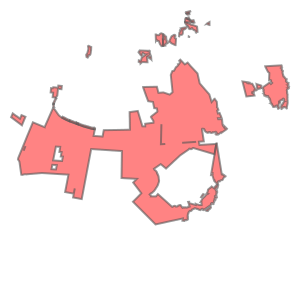

In [5]:
aoi_geopandas['geometry'][0]

In [6]:
aoi_geojson_gpd = geopandas.read_file(aoi_geojson_outpath)

In [7]:
aoi_geojson_gpd

,OBJECTID,CMPXNAME,ORGNAME,DIVNAME,UNITNAME,ORGCODE,MGMTCODE,LIT,STATUS,INTTYPE1,...,RSL_TYPE,FWSREGION,IntReg,SUM_GISACR,SUM_DOCACR,CostCenter,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
0,4961,North Carolina Coastal Plain Refuge Complex,POCOSIN LAKES NATIONAL WILDLIFE REFUGE,Pocosin Lakes National Wildlife Refuge,None,42535,42535,POC,0,O,...,NWR,4,2,116870.047421,111868.412,FF04RNPL00,{ED7E68E9-1A98-4893-A983-F6B5C35FF5E2},502513.188373,7.185043e+08,"MULTIPOLYGON (((-8514311.372 4249374.918, -851..."


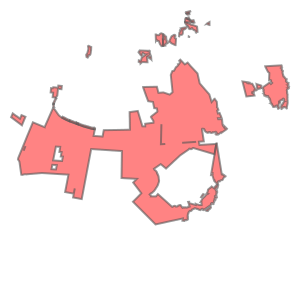

In [8]:
aoi_geojson_gpd['geometry'][0]

In [9]:
aoi_reprojected = aoi_geojson_gpd.to_crs(epsg=4326)
aoi_reprojected

,OBJECTID,CMPXNAME,ORGNAME,DIVNAME,UNITNAME,ORGCODE,MGMTCODE,LIT,STATUS,INTTYPE1,...,RSL_TYPE,FWSREGION,IntReg,SUM_GISACR,SUM_DOCACR,CostCenter,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
0,4961,North Carolina Coastal Plain Refuge Complex,POCOSIN LAKES NATIONAL WILDLIFE REFUGE,Pocosin Lakes National Wildlife Refuge,None,42535,42535,POC,0,O,...,NWR,4,2,116870.047421,111868.412,FF04RNPL00,{ED7E68E9-1A98-4893-A983-F6B5C35FF5E2},502513.188373,7.185043e+08,"MULTIPOLYGON (((-76.48536 35.62669, -76.50286 ..."


<b><H3> Convert well text file to geojson</H3> </b>

In [ ]:
# https://gis.stackexchange.com/questions/364236/converting-a-text-file-to-geojson


In [155]:
def replacee(s):
    i=str(s).find(',')
    if(i>0):
        return s[:i] + '.' + s[i+1:]
    else:
        return s

In [46]:
headers = pandas.read_csv(wells, sep=r'\t', index_col=0, nrows=0).columns.tolist()
# headers

C:\Users\cewil\AppData\Local\Temp\ipykernel_7340\620556618.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  headers = pandas.read_csv(wells, sep=r'\t', index_col=0, nrows=0).columns.tolist()


In [149]:
wells_pandas = pandas.read_csv(wells, names=headers, sep=r'\t') #, converters={'lat': lambda x: float(x.split('=')[0])}) #, converters={'lat': lambda x: float(x.split('=')[0]), 'lon': lambda x: float(x[1])})
# wells_pandas

C:\Users\cewil\AppData\Local\Temp\ipykernel_7340\2810471116.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  wells_pandas = pandas.read_csv(wells, names=headers, sep=r'\t') #, converters={'lat': lambda x: float(x.split('=')[0])}) #, converters={'lat': lambda x: float(x.split('=')[0]), 'lon': lambda x: float(x[1])})


In [164]:
wells_pandas['lat']=wells_pandas['lat'].apply(replacee)
wells_pandas['lon'] = wells_pandas['lon'].apply(replacee)

In [167]:
wells_pandas['lat'] = pandas.to_numeric(wells_pandas['lat'], errors='coerce')
wells_pandas['lon'] = pandas.to_numeric(wells_pandas['lon'], errors='coerce')

In [168]:
wells_pandas['lon']

quad               NaN
"O  10W2"   -76.208471
"O  10W3"   -76.208471
"O  10W6"   -76.208353
"M  12L1"   -76.354005
"M  12L2"   -76.354005
"M  12L3"   -76.354005
"M  12L4"   -76.354005
"M  12L5"   -76.354005
"M  12L6"   -76.354005
"O  13C2"   -76.451312
"O  13F1"   -76.485723
"M  12L8"   -76.354005
"L  15T1"   -76.597100
"L  15T2"   -76.597100
"L  15T3"   -76.597100
"L  15T4"   -76.597100
"L  15T5"   -76.597100
Name: lon, dtype: float64

In [170]:
# w_lat = pandas.Series(wells_pandas['lat'])
# w_lat_float = pandas.to_numeric(w_lat , errors='coerce')

# w_lon = pandas.Series(wells_pandas['lon'])
# w_lon_float = pandas.to_numeric(w_lon, errors='coerce')


In [169]:
# wells_pandas['lat']

Convert geopandas object to points

In [183]:
#https://stackoverflow.com/questions/69620465/how-to-input-dataset-from-txt-file-in-python-for-geojson

# wells_pandas
wells_geopandas = geopandas.GeoDataFrame(wells_pandas, geometry=geopandas.points_from_xy(wells_pandas.lon, wells_pandas.lat), crs="EPSG:4326")



In [188]:
wells_geopandas['geometry']

C:\Users\cewil\anaconda3\envs\flopy_env\Lib\site-packages\shapely\io.py:106: RuntimeWarning: invalid value encountered in to_wkt
  return lib.to_wkt(


quad                    POINT (nan nan)
"O  10W2"    POINT (-76.20847 35.42356)
"O  10W3"    POINT (-76.20847 35.42356)
"O  10W6"    POINT (-76.20835 35.42376)
"M  12L1"    POINT (-76.35401 35.62278)
"M  12L2"    POINT (-76.35401 35.62278)
"M  12L3"    POINT (-76.35401 35.62278)
"M  12L4"    POINT (-76.35401 35.62278)
"M  12L5"    POINT (-76.35401 35.62278)
"M  12L6"    POINT (-76.35401 35.62278)
"O  13C2"    POINT (-76.45131 35.49553)
"O  13F1"    POINT (-76.48572 35.48176)
"M  12L8"    POINT (-76.35401 35.62278)
"L  15T1"    POINT (-76.59710 35.68587)
"L  15T2"    POINT (-76.59710 35.68587)
"L  15T3"    POINT (-76.59710 35.68587)
"L  15T4"    POINT (-76.59710 35.68587)
"L  15T5"    POINT (-76.59710 35.68587)
Name: geometry, dtype: geometry

In [185]:
# gdf = geopandas.GeoDataFrame(wells_geopandas, geometry=geopandas.points_from

In [ ]:
# wells_geopandas_points = wells_geopandas.groupby(['name','depth'])['geometry'].apply(lambda x: shapely.geometry.LineString(x.tolist())).reset_index()

In [27]:
col = [pandas.read_csv]
df = pandas.read_csv(wells)

Object `folium.plot` not found.


In [189]:
m = folium.Map(location=(35.713118, -76.3797879),
               control_scale=True,
               zoom_start=11,
               min_lat=35.7085,
               max_lat=35.7432,
               min_lon=-76.3473,
               max_lon=-76.3631)
folium.GeoJson(data=wells_geopandas['geometry']).add_to(m)
folium.GeoJson(data=aoi_reprojected['geometry'][0], name=f'{aoi_reprojected["DIVNAME"][0]}').add_to(m)
folium.GeoJson(aoi_reprojected).add_to(m)
# folium.GeoJson(data=value['data']['features'][0]['geometry'], name=os.path.join(output_geojsons_folder, 'Pocosin.geojson')).add_to(m)
folium.LayerControl().add_to(m)
m